<table>
    <tr>
        <td><img src="./images/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Proyecto 1</p></tp>
            <tp><p style="font-size:150%;text-align:center">El mundo de los bloques</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

<b>Integrantes:</b> Luis Ángel de Ávila & Juan Andres Guevara

# El mundo de los Bloques

Planteamos nuestra adaptación del problema conocido como *El mundo de los bloques*, la cuál consiste en apilar 3 bloques de forma cúbica en una mesa de longitud igual a 3 veces la longitud de la arista de un bloque. Los bloques son apilados poniendo un único bloque encima de otro o encima de la mesa, pero no será posible apilar poniendo dos bloques (uno encima de otro) encima de un tercer bloque. El objetivo es mover los bloques desde un estado inicial hasta llegar a un estado objetivo deseado, como se muestra a continuación.

<table>
<tr>
<th><center>Estado inicial</center></th>
<th><center>Estado Objetivo</center></th>
</tr>

<tr>
<td> <img src="./images/start.png" alt="Drawing" style="width: 250px;"/></td>
<td> <img src="./images/end.png" alt="Drawing" style="width: 250px;"/></td>
</tr></table>

## Ambientes de tarea

Los ambientes de tarea que debemos atender con nuestro problema son:

- <b>Sensores:</b> Percepción de las pilas de bloques.
- <b>Acutadores:</b> Movimiento de los bloques.
- <b>Entorno:</b> Disposición de los bloques y la mesa.
- <b>Medida de Desempeño:</b> Alcanzar el estado objetivo y terminar con el menor número de movimientos posible.

## Entorno

El entorno sobre el cual desarrollaremos cuenta con las siguientes propiedades:

- Es completamente observable.
- Es de agente único.
- Es determinista.
- Es secuencial.
- Es estático.
- Es discreto.
- Es conocido.

## Definición Formal

### Estado inicial:
Una mesa con una disposición de 3 bloques.

### Posibles acciones:
Dado un estado *s*, podemos mover un bloque para apilarlo siempre y cuando esté ubicado sobre la mesa o en la cima de una pila.

### Función de transiciones:
Nuestra función de transiciones recibe un estado *s*, y retorna un estado *s+1* en donde algún bloque ha sido movido. 

### Prueba de satisfacción del objetivo:
¿La diposición de los bloques bloques sobre la mesa, coincide con el estado objetivo? 

### Función de costo:
Para el contexto de nuestro problema no es realmente necesario una función de costo, pero si tuvieramos que definir una, considerariamos que cada acción tendría el mismo costo.

## Implementación del problema

Para la implementación del problema construimos la clase *MundoBloques* en python. A continuación pondremos a prueba distintos estados iniciales y estados objetivos, midiendo su tiempo de ejecución y resolviendo el problema con distintos algoritmos de búsqueda.

In [1]:
from blocks import MundoBloques
from busqueda import *

<b>Ejemplo 1: Breadth first search</b>

Número de movimientos: 3
Wall time: 32.3 ms


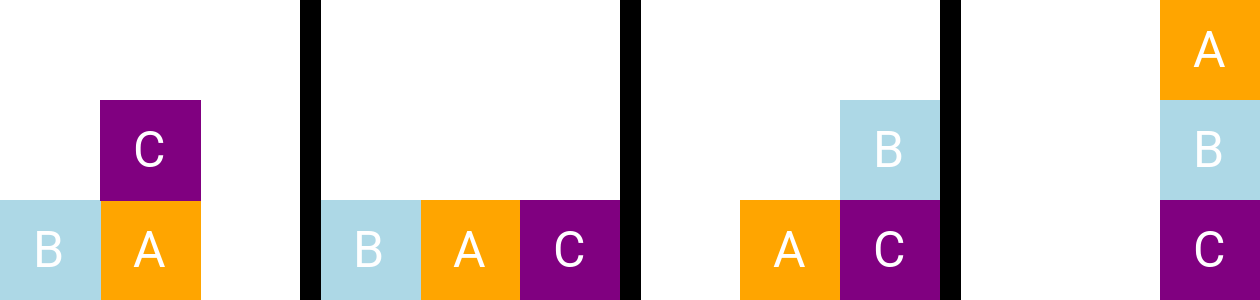

In [2]:
%%time
# Inicializamos nuestro problema colocando el estado inicial, el estado objetivo, la longitud de la mesa y el número de bloques
# Estos dos últimos tienen que ser iguales
prob = MundoBloques([(2, 1), (2, 0), (1, 1)], [(0, 2), (1, 2), (2, 2)], 3, 3) 
x = breadth_first_search(prob)
nodes = find_path(x) 
statelist = [nod.estado for nod in nodes] # Encontramos la secuencia solución en nuestro árbol de estados
print("Número de movimientos:", len(statelist))
prob.PintarTransiciones(statelist)

<b>Ejemplo 1: Depth first search</b>

Número de movimientos: 33
Wall time: 58 ms


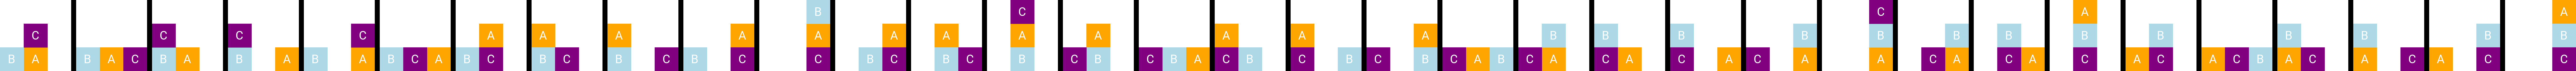

In [3]:
%%time
x = depth_first_search(prob)
nodes = find_path(x)
statelist = [nod.estado for nod in nodes]
print("Número de movimientos:", len(statelist))
prob.PintarTransiciones(statelist)

<b>Ejemplo 1: Iterative deepening search</b>

Número de movimientos: 3
Wall time: 8.4 ms


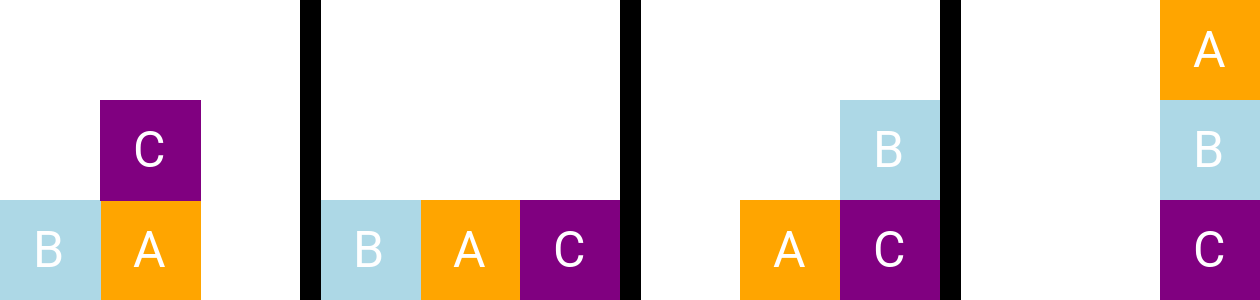

In [9]:
%%time
x = iterative_deepening_search(prob, l_max=5)
nodes = find_path(x)
statelist = [nod.estado for nod in nodes]
print("Número de movimientos:", len(statelist))
prob.PintarTransiciones(statelist)

<b>Ejemplo 1: Best first search</b>

Número de movimientos: 3
Wall time: 8.99 ms


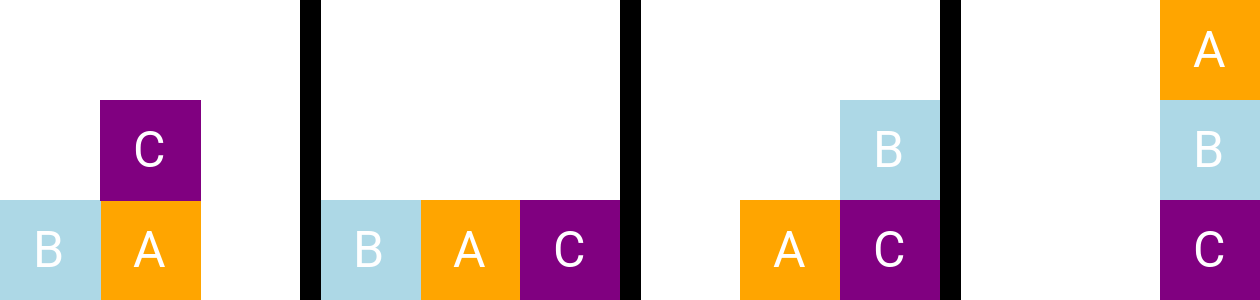

In [10]:
%%time
def costo_accion(estado, accion):
    return 1
setattr(prob, "costo", costo_accion)

x = best_first_search(prob)
nodes = find_path(x)
statelist = [nod.estado for nod in nodes]
print("Número de movimientos:", len(statelist))
prob.PintarTransiciones(statelist)

Como podemos evidenciar, si organizamos los algoritmos según su eficiencia (menor tiempo y menor número de movimientos), tendríamos el siguiente orden:

1. Iterative deepening search
2. Best first search
3. Breadth first search
4. Depth first search

Todos los algoritmos lograron llegar al estado objetivo en un muy buen tiempo, sin embargo, la secuencia de estados dada por el *Depth first search* no es eficiente debido al número de movimientos necesarios para alcanzar el estado objetivo.

<b>Ejemplo 2: Breadth first search</b>

Número de movimientos: 4
Wall time: 16.9 ms


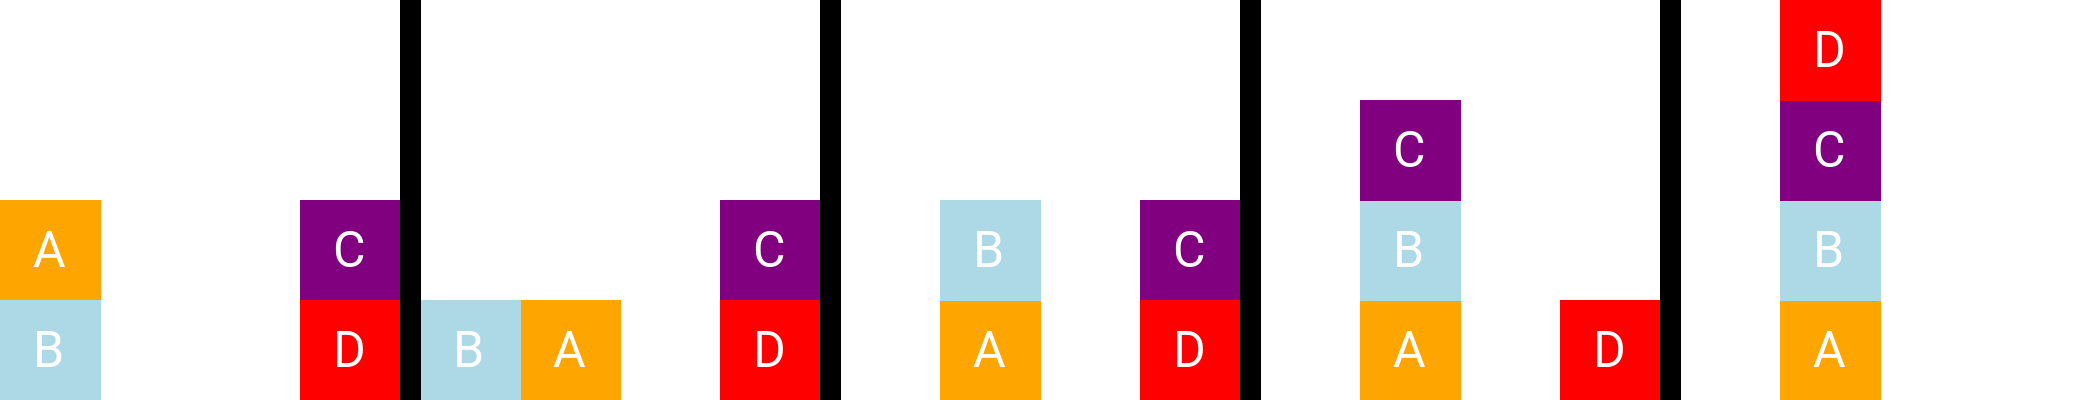

In [18]:
%%time
prob = MundoBloques([(2, 0), (3, 0), (2, 3), (3,3)], [(3, 1), (2, 1), (1, 1), (0,1)], 4, 4) 
x = breadth_first_search(prob)
nodes = find_path(x)
statelist = [nod.estado for nod in nodes]
print("Número de movimientos:", len(statelist))
prob.PintarTransiciones(statelist)

<b>Ejemplo 2: Depth first search</b>

Número de movimientos: 473
Wall time: 38.9 ms


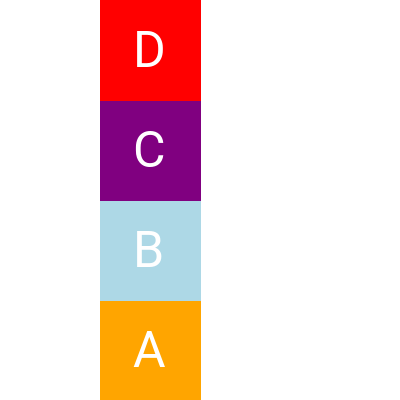

In [16]:
%%time 
x = depth_first_search(prob)
nodes = find_path(x)
statelist = [nod.estado for nod in nodes]
print("Número de movimientos:", len(statelist))
# prob.PintarTransiciones(statelist)
# Pintamos el último estado de la secuencia, ya que debido al número de movimientos no podemos ver todas las transiciones
# en una sola imágen
prob.PintarEstado(x.estado) 

<b>Ejemplo 2: Iterative deepening search</b>

Número de movimientos: 4
Wall time: 35 ms


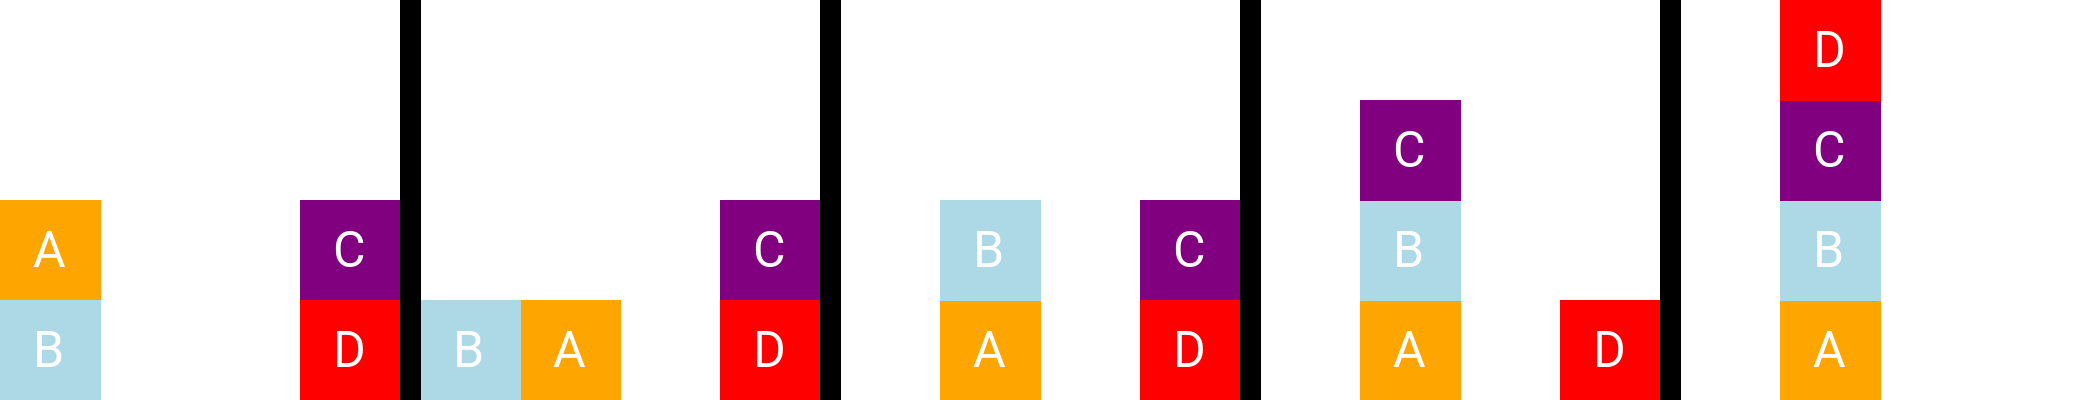

In [17]:
%%time
x = iterative_deepening_search(prob, l_max=5)
nodes = find_path(x)
statelist = [nod.estado for nod in nodes]
print("Número de movimientos:", len(statelist))
prob.PintarTransiciones(statelist)

<b>Ejemplo 2: Best first search</b>

Número de movimientos: 4
Wall time: 23.8 ms


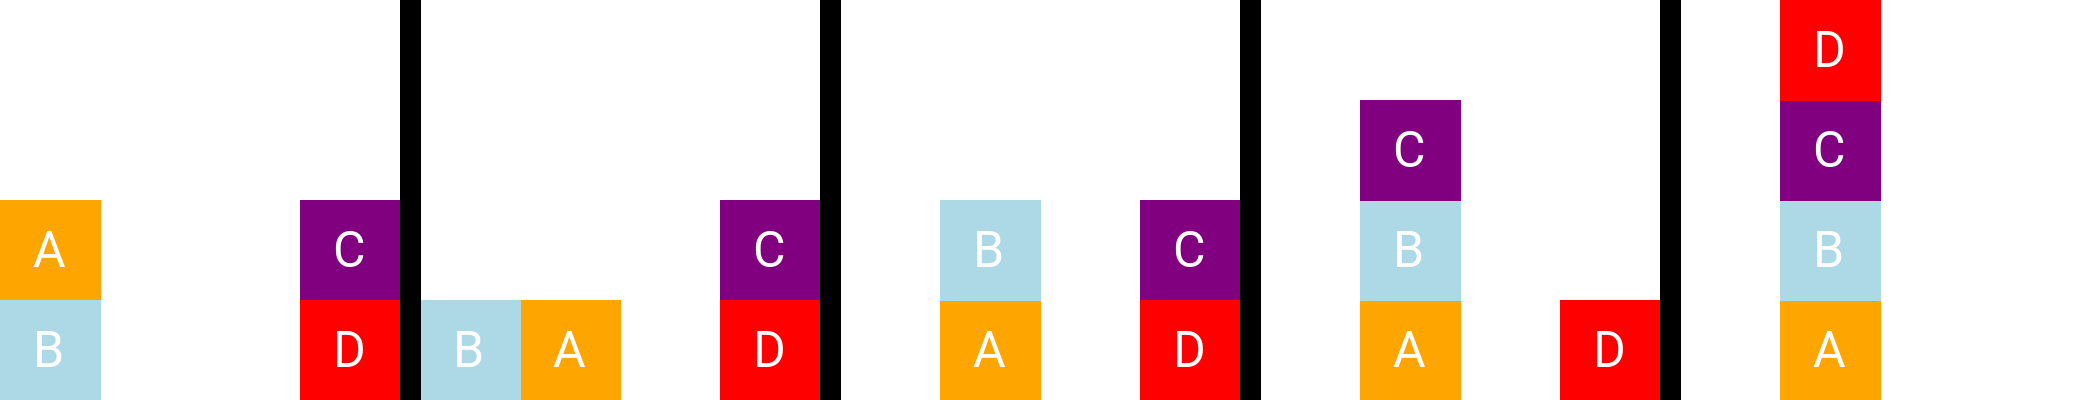

In [19]:
%%time
x = best_first_search(prob)
nodes = find_path(x)
statelist = [nod.estado for nod in nodes]
print("Número de movimientos:", len(statelist))
prob.PintarTransiciones(statelist)

Como podemos evidenciar en este otro ejemplo, si organizamos los algoritmos según su eficiencia (menor tiempo y menor número de movimientos),
tendríamos el siguiente orden:

1. Best first search
2. Iterative deepening search
3. Breadth first search
4. Depth first search

Todos los algoritmos lograron llegar al estado objetivo en un muy buen tiempo, sin embargo, la secuencia de estados 
dada por el *Depth first search* no es eficiente debido al número de movimientos necesarios para alcanzar el estado objetivo.

<b>Ejemplo 3: Best first search</b>

Número de movimientos: 8
Wall time: 1min 7s


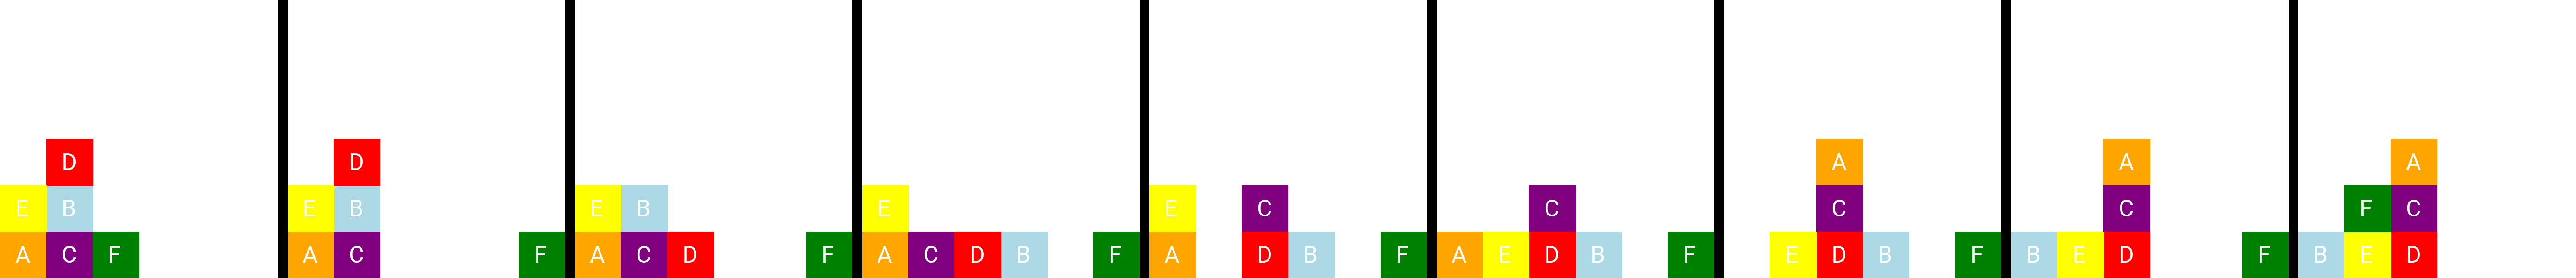

In [13]:
%%time
prob = MundoBloques([(5, 0), (4, 1), (5, 1), (3,1), (4,0), (5,2)], 
                    [(3, 2), (5, 0), (4, 2), (5,2), (5,1), (4,1)], 6, 6)

x = best_first_search(prob)
nodes = find_path(x)
statelist = [nod.estado for nod in nodes]
print("Número de movimientos:", len(statelist))
prob.PintarTransiciones(statelist)

Para este problema en particular, solo el *Best first search* pudo terminar su ejecución. Este ejemplo, denota el límite del número de bloques que nuestra implementación puede soportar para solucionar el problema. 

<b>Ejemplo 4: Best first search</b>

Note que si consideramos un problema con un mayor número de bloques, el problema no va a poder ser solucionado por ninguno de los algoritmos de búsqueda.

In [ ]:
%%time
prob = MundoBloques([(12, 0), (12, 1), (11, 1), (11,2), (11,3), (12,2), (10,2), (12,5), (11,5), (12,8), (12,3), (10,3) ,(12,4)], 
                    [(11, 6), (12, 6), (11, 7), (12,9), (12,11), (10,6), (12,5), (11,10), (12,7), (12,8), (12,10), (10,10), (11,9)], 13, 13)

x = best_first_search(prob)
nodes = find_path(x)
statelist = [nod.estado for nod in nodes]
print("Número de movimientos:", len(statelist))
prob.PintarTransiciones(statelist)